# Kings County Housing Data

In [1]:
# importing libraries 
import pandas as pd 
import seaborn as sns

In [19]:
# opening the dataset
housing_data = pd.read_csv('KC_Data/kc_house_data.csv')
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [86]:
pd.set_option('display.max_columns', None)
greenbelt_houses = housing_data.loc[housing_data['greenbelt'] == 'YES']
greenbelt_houses.loc[:,['sqft_lot']].describe()

,sqft_lot
count,773.000000
mean,11963.272962
std,16818.761792
min,865.000000
25%,5399.000000
50%,7741.000000
75%,12091.000000
max,213092.000000


In [112]:
greenbelt_houses['date'].astype('datetime64').dt.strftime('%Y').astype('int64')

21       2022
63       2021
95       2021
141      2021
153      2022
         ... 
29875    2022
29894    2021
29967    2021
30070    2021
30073    2021
Name: date, Length: 773, dtype: int64

In [127]:
housing_data['date'] = housing_data['date'].astype('datetime64').dt.strftime('%Y')

<Axes: xlabel='date', ylabel='Count'>

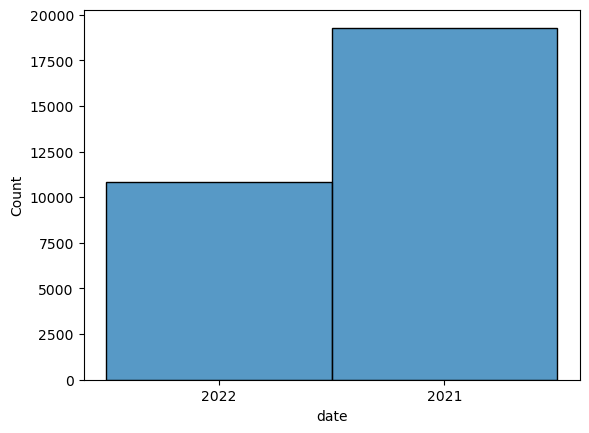

In [128]:
import seaborn as sns 
sns.histplot(housing_data['date'])

In [ ]:
# notes 
# grade column 
# predictor(y) : price 
# features : neighborhood 
# more than 30k houses 
# 773 houses are by a greenbelt 
# avg price for a house in greenbelt is 1.5
# not many houses were renovated before being sold 
# majority of the houses were sold only in two years 2021, 2022